In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [52]:
data_dir="datasets/"

games=pd.read_csv(data_dir+"steam_games.csv",sep=";")
reviews=pd.read_csv(data_dir+"user_reviews.csv",sep=";")
items=pd.read_csv(data_dir+"users_items.csv",sep=";")

Con el siguiente grafico se pueden ver muchos outliers

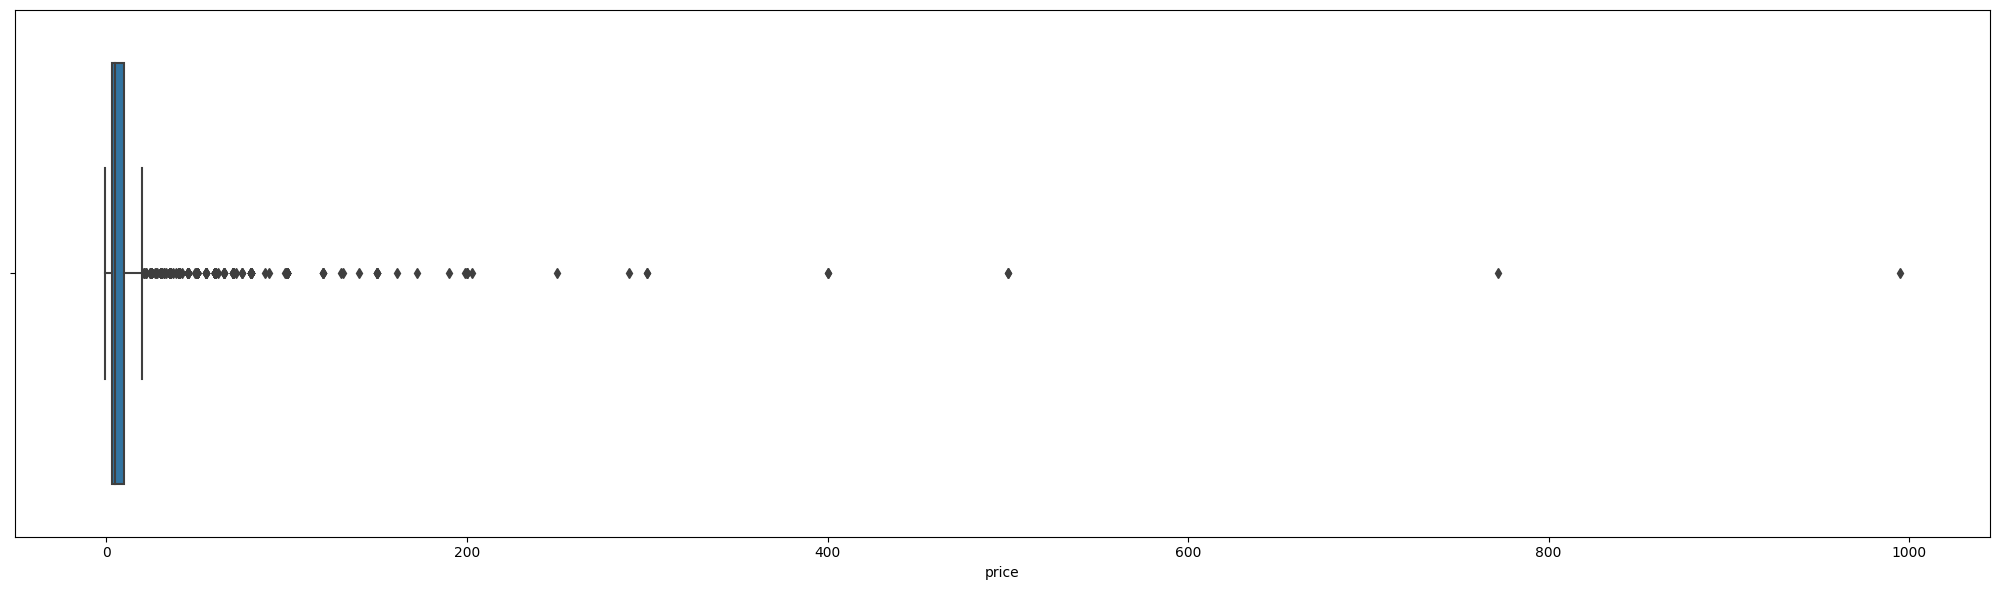

In [53]:
plt.figure(figsize=(40, 6))

plt.subplot(1, 2, 1)  # Primera visualización
sns.boxplot(x='price', data=games)


plt.tight_layout()  # Ajusta el espacio entre los gráficos

plt.show()

Aqui vamos a ver cuantos outliers hay...

In [5]:
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)

IQR = Q3 - Q1

# Definimos los límites para considerar los valores como outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los outliers
outliers = games[(games['price'] < limite_inferior) | (games['price'] > limite_superior)]

# Contamos la cantidad de outliers
cantidad_outliers = outliers.shape[0]

print(f"La cantidad de outliers es: {cantidad_outliers}")



La cantidad de outliers es: 1362


In [54]:
#tengo que hacer un ast con las columnas ast y genres y hacer un diagrama de dispersion para sacar alguna explicacion tonta
games["tags"]=games["tags"].apply(lambda x:ast.literal_eval(x))
games["genres"]=games["genres"].apply(lambda x:ast.literal_eval(x))

generos=[]
for i in games.index:
    for n in games.at[i,"genres"]:
        if n not in generos:
            generos.append(n)

tags=[]
for i in games.index:
    for n in games.at[i,"tags"]:
        if n not in tags:
            tags.append(n)

In [55]:
generos_n={}
for i in range(len(generos)):
    generos_n[generos[i]]=i

tags_n={}
for i in range(len(tags)):
    tags_n[tags[i]]=i

En el siguiente grafico, vemos que el genero "Free to play" tiene precios que puede hasta a llegar a a ser altos con respecto a otros,
pero si es gratis por que tiene un precio, es posible que durante un tiempo fue gratis y luego ya no, aun asi seria una inconsistencia, y como no hay forma de saberlo, lo correcto seria establecer como precio 0 en los generos o tags que este incluido "Free to play"
esto lo agregaria al archivo donde se hacen las transformaciones

lo otro es que hay juegos que son absurdamente caros, aunque son pocos hay un par que estan cerca de los 1000. Investigue si han existido juegos
con tales precios, y si a veces en steam hay juegos que pueden tener esos precios.
Aqui dejo un ejemplo de top 5 juegos mas caros de steam publicado el 09/06/2023.

https://www.esportmaniacos.com/videojuegos/videojuegos-mas-caros-steam/

El juego mas cara alcanza los 2000 dolares

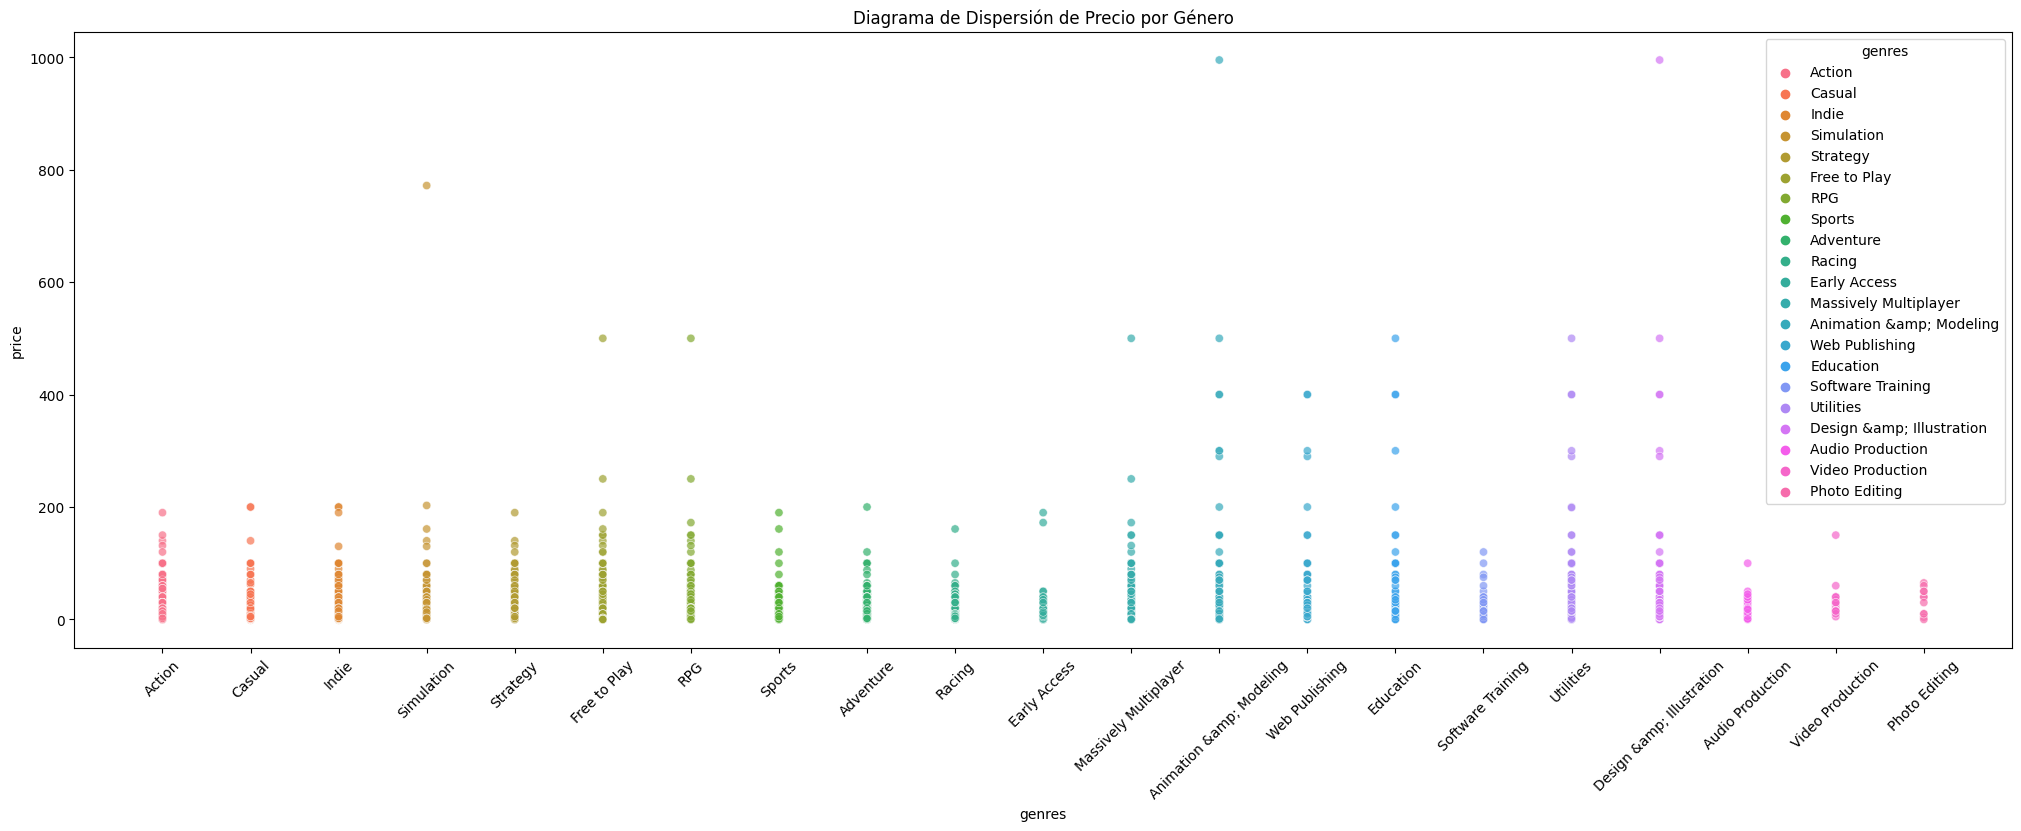

In [57]:
# df tiene una columna 'genres' con listas de géneros y una columna 'price'

# Primero, expandimos la lista de géneros en filas y duplicamos el precio
df_exploded = games.explode('genres')[['genres', 'price']]
df_filtered = df_exploded[df_exploded['genres'].isin(generos)]

plt.figure(figsize=(25, 8))
sns.scatterplot(x='genres', y='price', data=df_filtered, hue='genres', alpha=0.7)

plt.title('Diagrama de Dispersión de Precio por Género')
plt.xticks(rotation=45)
plt.show()


